# NAME- Venkata Sai Krishna Nivarthi
REG NO- 2028232

COURSE- BUSINESS ANALYTICS

SUBJECT- DATA ANALYSIS AND APPLICATION USING PYTHON

# CIA-3- K-Means Clustering and Logistic Regression

Brief overview of the project- The marketing dataset is divided into 4p's i.e., Price, product, place and promotion. Here we are analyzing the customer purchases of different products within one company.The data set marketing_data.csv consists of 2,240 customers of XYZ company with data on:

Customer profiles

Product preferences

Campaign successes/failures

Channel performance

# Import libraries and reading the data

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the data using pandas
df= pd.read_csv("marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
'''DESCRIPTION OF THE VARIABLES-
DATA DICTIONARY

People

ID: Customer’s unique identifier
Year_Birth: Customer’s birth year
Education: Customer’s education level
Marital_Status: Customer’s marital status
Income: Customer’s yearly household income
Kidhome: Number of children in customer’s household
Teenhome: Number of teenagers in customer’s household
Dt_Customer: Date of customer’s enrollment with the company
Recency: Number of days since customer’s last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise
Country: Customer’s location


Products

MntWines: Amount spent on wine in the last 2 years
MntFruits: Amount spent on fruits in the last 2 years
MntMeatProducts: Amount spent on meat in the last 2 years
MntFishProducts: Amount spent on fish in the last 2 years
MntSweetProducts: Amount spent on sweets in the last 2 years
MntGoldProds: Amount spent on gold in the last 2 years


Place

NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month


Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise'''


'DESCRIPTION OF THE VARIABLES-\nDATA DICTIONARY\n\nPeople\n\nID: Customer’s unique identifier\nYear_Birth: Customer’s birth year\nEducation: Customer’s education level\nMarital_Status: Customer’s marital status\nIncome: Customer’s yearly household income\nKidhome: Number of children in customer’s household\nTeenhome: Number of teenagers in customer’s household\nDt_Customer: Date of customer’s enrollment with the company\nRecency: Number of days since customer’s last purchase\nComplain: 1 if customer complained in the last 2 years, 0 otherwise\nCountry: Customer’s location\n\n\nProducts\n\nMntWines: Amount spent on wine in the last 2 years\nMntFruits: Amount spent on fruits in the last 2 years\nMntMeatProducts: Amount spent on meat in the last 2 years\nMntFishProducts: Amount spent on fish in the last 2 years\nMntSweetProducts: Amount spent on sweets in the last 2 years\nMntGoldProds: Amount spent on gold in the last 2 years\n\n\nPlace\n\nNumWebPurchases: Number of purchases made throug

In [4]:
df.shape
#We have 2240 rows with 28 variables in the dataset.

(2240, 28)

In [5]:
# Here the output shows the information of the dataset
df.info()
#We see that column_name "Income" has a space before it's name that will create problems in further analysis, so we'll rename it.

#There looks a problem with 2 column's datatypes. We need to change the datatype of "Income" column into int64 so that it can be used for further calculations 
#and change the datatype of "Dt_Customer" into datetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              1940 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
#We see that column_name "Income" has a space before it's name that will create problems in further analysis, so we'll rename itdf.rename(columns={' Income ':'Income'},inplace=True)
df.rename(columns={' Income ':'Income'},inplace=True)

In [7]:
#The date, month, year datatype is given as object, changing into datetime.
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) 
#Here there is $ dollar symbol and comma(,), we are removing it. as the datatype will be float
df["Income"] = df["Income"].str.replace("$","").str.replace(",","") 
#The income variable is changed to float datatype
df["Income"] = df["Income"].astype(float)

In [8]:
df.head()
#Here we can see that the dollar symbol is removed

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [9]:
df.info()
#We can see the dt_customer changed to datetime datatype and income changesd to float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               1940 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [10]:
df.nunique()
#We have data of 2240 unique Customers. No customer ID is repeated in the data.

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1750
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [11]:
# Removing unnecessary column
# We dont need column like ID
df.drop(['ID'],axis=1,inplace =True)

In [12]:
#checking for duplicate values
df.duplicated().sum()
#we have 40 duplicated values in the dataset

40

In [13]:
#Dropping the duplicates because it will create no accurate output
df= df.drop_duplicates() 

In [14]:
df.shape
#no duplicates present in the data, total rows are 2200

(2200, 27)

# Handle missing values

In [15]:
df.isnull().sum()

Year_Birth               0
Education                0
Marital_Status           0
Income                 299
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Response                 0
Complain                 0
Country                  0
dtype: int64

'We can see that the distribution is rightly skewed. \nIt has outliers towards the right and so, mean will not be a good imputation method as mean is sensitive to outliers.\nwe need to take median as imputation.'

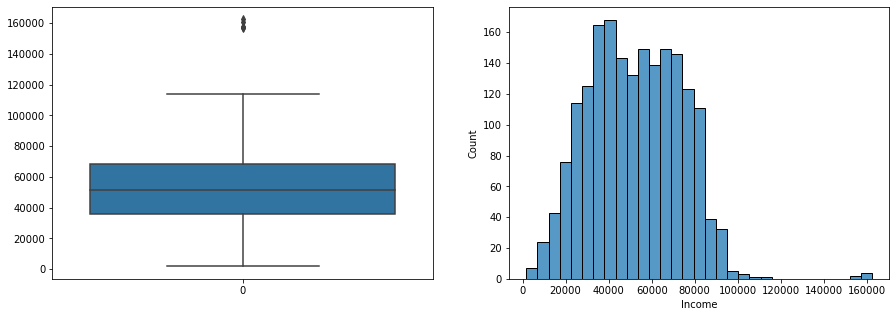

In [16]:
#To check the skewness, let us plot the boxplot and histogram.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = df["Income"])
plt.subplot(1,2,2)
sns.histplot(df["Income"])


'''We can see that the distribution is rightly skewed. 
It has outliers towards the right and so, mean will not be a good imputation method as mean is sensitive to outliers.
we need to take median as imputation.'''

In [17]:
df["Income"].fillna(value=df["Income"].median(),inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2200 non-null   int64         
 1   Education            2200 non-null   object        
 2   Marital_Status       2200 non-null   object        
 3   Income               2200 non-null   float64       
 4   Kidhome              2200 non-null   int64         
 5   Teenhome             2200 non-null   int64         
 6   Dt_Customer          2200 non-null   datetime64[ns]
 7   Recency              2200 non-null   int64         
 8   MntWines             2200 non-null   int64         
 9   MntFruits            2200 non-null   int64         
 10  MntMeatProducts      2200 non-null   int64         
 11  MntFishProducts      2200 non-null   int64         
 12  MntSweetProducts     2200 non-null   int64         
 13  MntGoldProds         2200 non-nul

# 1) PROBLEM STATEMENT- The company wanted to find how many clusters are appropriate and grouping a set of products in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups 

It is a part of pre-processing, not a prediction

It is unsupervised learning

We are creating groups according to the prices of different products

From this clustering we get to know how many groups are appropriate


In [19]:
#subsetting the dataframe for clustering
num=df[['Education','Marital_Status','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]
num

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Graduation,Divorced,189,104,379,111,189,218
1,Graduation,Single,464,5,64,7,0,37
2,Graduation,Married,134,11,59,15,2,30
3,Graduation,Together,10,0,1,0,0,0
4,Graduation,Single,6,16,24,11,0,34
...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,372,18,126,47,48,78
2236,2n Cycle,Married,5,10,13,3,8,16
2237,Graduation,Divorced,185,2,88,15,5,14
2238,Graduation,Married,267,38,701,149,165,63


# Clustering is all about grouping the data according to the characteristics

In [20]:
num.head()

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Graduation,Divorced,189,104,379,111,189,218
1,Graduation,Single,464,5,64,7,0,37
2,Graduation,Married,134,11,59,15,2,30
3,Graduation,Together,10,0,1,0,0,0
4,Graduation,Single,6,16,24,11,0,34


In [21]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_num = scaler.fit_transform(num[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']] )


For deciding the number of clusters we have two methods
1. Dendogram 
2. Elbow method
3. THese two methods decides the value to be kept for 'K'
4. Elbow method is a method which HAS X AXIS HAS CLUSTERS and y axis has errors
5. Here below after cluster 4 there is no much difference so we can say that there are only cluster between 5 or 6
6. So we can consider clusters as either k=5 or k=6


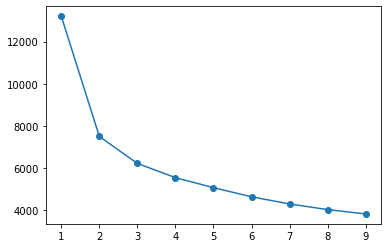

In [22]:
# Creating Elbow Plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters ) 
    clusters.fit( scaled_num )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" )

In [23]:
#k=5
k = 5
clusters = KMeans(k, random_state = 42)  
clusters.fit(scaled_num)  
num["clusterid"] = clusters.labels_ 

<ipython-input-23-5b5bc9e7f955>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num["clusterid"] = clusters.labels_


In [24]:
# here it shows the data points for cluster 0
#Cluster 0
num[num.clusterid == 0].head(10)

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,clusterid
1,Graduation,Single,464,5,64,7,0,37,0
2,Graduation,Married,134,11,59,15,2,30,0
3,Graduation,Together,10,0,1,0,0,0,0
4,Graduation,Single,6,16,24,11,0,34,0
7,Graduation,Together,78,0,11,0,0,7,0
8,PhD,Married,384,0,102,21,32,5,0
9,PhD,Married,384,0,102,21,32,5,0
11,Master,Together,140,4,61,0,13,4,0
13,Graduation,Married,3,10,8,3,16,32,0
15,Graduation,Married,63,6,57,13,13,22,0


In [25]:
# here it shows the data points for cluster 1
#Cluster 1
num[num.clusterid == 1].head(10)

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,clusterid
0,Graduation,Divorced,189,104,379,111,189,218,1
31,Graduation,Married,423,42,706,73,197,197,1
36,2n Cycle,Married,71,22,112,138,89,29,1
39,Graduation,Married,378,0,189,97,172,172,1
42,2n Cycle,Single,709,45,115,30,160,45,1
71,2n Cycle,Divorced,983,76,184,180,138,27,1
78,Master,Married,650,37,780,27,167,32,1
98,Graduation,Married,421,76,536,82,178,102,1
108,PhD,Married,863,83,547,86,99,33,1
118,Master,Married,179,28,520,111,123,47,1


In [26]:
# here it shows the data points for cluster 2
#Cluster 2
num[num.clusterid == 2]

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,clusterid
14,Graduation,Married,16,4,12,2,4,321,2
48,Graduation,Divorced,158,35,179,0,0,125,2
60,Master,Single,67,11,26,4,3,262,2
72,Master,Married,262,6,61,0,10,102,2
94,Graduation,Married,180,32,348,76,32,90,2
...,...,...,...,...,...,...,...,...,...
2170,Graduation,Married,231,65,196,38,71,124,2
2175,Graduation,Married,115,27,44,4,146,139,2
2219,Graduation,Divorced,563,50,774,28,31,187,2
2220,Master,Together,73,28,217,10,24,115,2


In [27]:
# here it shows the data points for cluster 3
#Cluster 3
num[num.clusterid == 3]

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,clusterid
5,PhD,Single,336,130,411,240,32,43,3
12,PhD,Widow,431,82,441,80,20,102,3
29,Graduation,Single,184,174,256,50,30,32,3
45,Graduation,Together,539,169,816,20,0,30,3
51,Master,Married,496,36,460,189,60,12,3
...,...,...,...,...,...,...,...,...,...
2145,Graduation,Married,627,120,414,121,80,93,3
2190,Graduation,Divorced,412,172,153,150,105,57,3
2223,Graduation,Together,453,38,279,188,38,183,3
2226,Graduation,Single,273,86,208,177,14,43,3


In [28]:
# here it shows the data points for cluster 4
#Cluster 4
num[num.clusterid == 4]

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,clusterid
6,2n Cycle,Married,769,80,252,15,34,65,4
10,2n Cycle,Married,450,26,535,73,98,26,4
24,Graduation,Single,266,21,300,65,8,44,4
35,PhD,Single,1285,21,449,106,20,20,4
38,PhD,Single,1248,16,349,43,16,16,4
...,...,...,...,...,...,...,...,...,...
2208,Graduation,Together,997,15,414,99,30,76,4
2212,PhD,Divorced,982,17,672,23,34,51,4
2215,Graduation,Married,920,138,168,36,46,30,4
2227,Graduation,Together,362,17,398,80,35,61,4


# Below we are changing the number of clusters and doing the same operations again

In [29]:
#k=6
k = 6
clusters = KMeans(k, random_state = 42)  
clusters.fit(scaled_num)  
num["clusterid"] = clusters.labels_ 

<ipython-input-29-4149283b5433>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num["clusterid"] = clusters.labels_


In [30]:
# here it shows the data points for cluster 0
#Cluster 0
num[num.clusterid == 0]

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,clusterid
1,Graduation,Single,464,5,64,7,0,37,0
2,Graduation,Married,134,11,59,15,2,30,0
3,Graduation,Together,10,0,1,0,0,0,0
4,Graduation,Single,6,16,24,11,0,34,0
7,Graduation,Together,78,0,11,0,0,7,0
...,...,...,...,...,...,...,...,...,...
2231,Graduation,Widow,55,0,6,2,0,4,0
2232,Graduation,Widow,55,0,6,2,0,4,0
2233,2n Cycle,Divorced,15,6,8,7,4,25,0
2236,2n Cycle,Married,5,10,13,3,8,16,0


In [31]:
# here it shows the data points for cluster 1
#Cluster 1
num[num.clusterid == 1]

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,clusterid
5,PhD,Single,336,130,411,240,32,43,1
29,Graduation,Single,184,174,256,50,30,32,1
74,Graduation,Married,739,107,309,140,80,35,1
75,Graduation,Together,610,105,125,137,42,21,1
91,PhD,Married,463,96,333,168,53,10,1
...,...,...,...,...,...,...,...,...,...
2185,Graduation,Divorced,756,138,354,160,169,61,1
2190,Graduation,Divorced,412,172,153,150,105,57,1
2197,Graduation,Together,382,114,276,75,124,38,1
2215,Graduation,Married,920,138,168,36,46,30,1


In [32]:
# here it shows the data points for cluster 2
#Cluster 2
num[num.clusterid == 2]

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,clusterid
6,2n Cycle,Married,769,80,252,15,34,65,2
24,Graduation,Single,266,21,300,65,8,44,2
26,Graduation,Together,454,0,171,8,19,32,2
38,PhD,Single,1248,16,349,43,16,16,2
41,PhD,Married,1200,0,204,38,29,14,2
...,...,...,...,...,...,...,...,...,...
2201,PhD,Married,479,28,136,75,14,35,2
2209,2n Cycle,Married,508,11,59,23,5,29,2
2210,Graduation,Married,538,13,91,17,6,26,2
2234,Graduation,Divorced,321,11,309,33,26,34,2


In [33]:
# here it shows the data points for cluster 3
#Cluster 3
num[num.clusterid == 3]

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,clusterid
0,Graduation,Divorced,189,104,379,111,189,218,3
10,2n Cycle,Married,450,26,535,73,98,26,3
31,Graduation,Married,423,42,706,73,197,197,3
36,2n Cycle,Married,71,22,112,138,89,29,3
39,Graduation,Married,378,0,189,97,172,172,3
...,...,...,...,...,...,...,...,...,...
2175,Graduation,Married,115,27,44,4,146,139,3
2206,Graduation,Widow,901,61,757,186,163,20,3
2213,PhD,Together,466,22,432,147,113,102,3
2218,Graduation,Single,433,89,650,16,102,102,3


In [34]:
# here it shows the data points for cluster 4
#Cluster 4
num[num.clusterid == 4]

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,clusterid
12,PhD,Widow,431,82,441,80,20,102,4
35,PhD,Single,1285,21,449,106,20,20,4
45,Graduation,Together,539,169,816,20,0,30,4
51,Master,Married,496,36,460,189,60,12,4
53,Graduation,Married,292,51,981,224,23,17,4
...,...,...,...,...,...,...,...,...,...
2207,Graduation,Together,997,15,414,99,30,76,4
2208,Graduation,Together,997,15,414,99,30,76,4
2212,PhD,Divorced,982,17,672,23,34,51,4
2227,Graduation,Together,362,17,398,80,35,61,4


In [35]:
# here it shows the data points for cluster 5
#Cluster 5
num[num.clusterid == 5]

,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,clusterid
14,Graduation,Married,16,4,12,2,4,321,5
48,Graduation,Divorced,158,35,179,0,0,125,5
60,Master,Single,67,11,26,4,3,262,5
72,Master,Married,262,6,61,0,10,102,5
94,Graduation,Married,180,32,348,76,32,90,5
...,...,...,...,...,...,...,...,...,...
2168,PhD,Together,712,0,45,0,0,191,5
2170,Graduation,Married,231,65,196,38,71,124,5
2219,Graduation,Divorced,563,50,774,28,31,187,5
2220,Master,Together,73,28,217,10,24,115,5


# LOGISTIC REGRESSION

# 2) Problem statement- The XYZ Company wanted to release the product according to the campaign so to Predict the response of the customer whether they are accepted the offer in the last campaign or they are rejecting it, By that we have considered dependent variable as 'Response'

In [36]:
#Creating the new dataframe naming it as log
log=df[['Response','Income', 'Education', 'Marital_Status','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]
log.head(10)

,Response,Income,Education,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1,84835.0,Graduation,Divorced,189,104,379,111,189,218
1,1,57091.0,Graduation,Single,464,5,64,7,0,37
2,0,67267.0,Graduation,Married,134,11,59,15,2,30
3,0,32474.0,Graduation,Together,10,0,1,0,0,0
4,1,21474.0,Graduation,Single,6,16,24,11,0,34
5,1,71691.0,PhD,Single,336,130,411,240,32,43
6,1,63564.0,2n Cycle,Married,769,80,252,15,34,65
7,0,44931.0,Graduation,Together,78,0,11,0,0,7
8,0,51563.0,PhD,Married,384,0,102,21,32,5
9,0,65324.0,PhD,Married,384,0,102,21,32,5


In [37]:
#checking the datatypes
log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Response          2200 non-null   int64  
 1   Income            2200 non-null   float64
 2   Education         2200 non-null   object 
 3   Marital_Status    2200 non-null   object 
 4   MntWines          2200 non-null   int64  
 5   MntFruits         2200 non-null   int64  
 6   MntMeatProducts   2200 non-null   int64  
 7   MntFishProducts   2200 non-null   int64  
 8   MntSweetProducts  2200 non-null   int64  
 9   MntGoldProds      2200 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 269.1+ KB


In [38]:
#importing the libraries which are needed for logistic regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

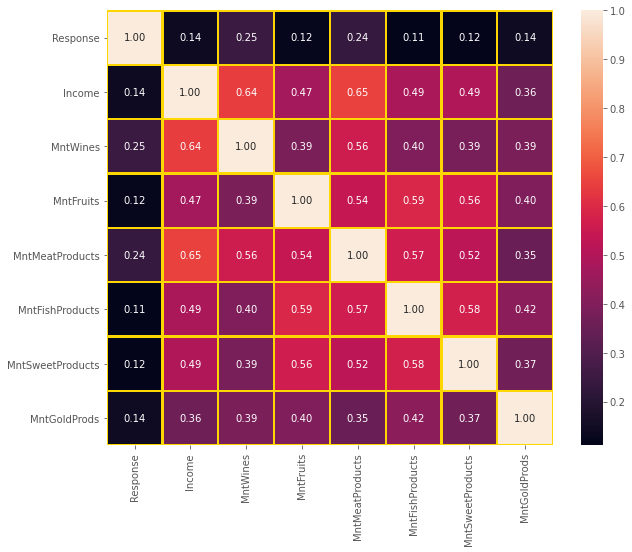

In [39]:
## The below shows the Correlation graph between the variables in the dataset
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (10,8))
sns.heatmap(log.corr(),robust=True,fmt='.2f',linewidths=1.3,linecolor = 'gold', annot=True,);

In [40]:
# Here we have added constant to the equation
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
Y=log['Response']
log.drop(['Response','Education','Marital_Status'], axis = 1, inplace=True)
X = sm.add_constant(log)

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
#creating train and test dataset
train_X, test_X, train_y, test_y = train_test_split(X,  Y,  train_size = 0.8,  random_state = 42) 
X.head()

,const,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1.0,84835.0,189,104,379,111,189,218
1,1.0,57091.0,464,5,64,7,0,37
2,1.0,67267.0,134,11,59,15,2,30
3,1.0,32474.0,10,0,1,0,0,0
4,1.0,21474.0,6,16,24,11,0,34


In [42]:
# Now we are building Logistic regression model
# Building Logistic Regression Model
#here we are making use of logit function
logit=sm.Logit(train_y,train_X)
logit_model=logit.fit()

#in 6 iterations the objective function is optimised, so the value of function is 0.372

Optimization terminated successfully.
         Current function value: 0.372108
         Iterations 6


In [43]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.092     
Dependent Variable: Response         AIC:              1325.8211 
Date:               2021-09-20 21:35 BIC:              1369.6057 
No. Observations:   1760             Log-Likelihood:   -654.91   
Df Model:           7                LL-Null:          -721.04   
Df Residuals:       1752             LLR p-value:      2.1269e-25
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -2.1039   0.2393 -8.7932 0.0000 -2.5729 -1.6350
Income            -0.0000   0.0000 -2.6828 0.0073 -0.0000 -0.0000
MntWines           0.0014   0.0002  5.5529 0.0000  0.0009  0.0018
MntFruits          0.0004   0.0021  0.1872 0.8515 -0.0037  0.0045
MntMeatProducts    0.0023   0.0004  5.6771 0.0000  0.0015  0.0030
MntFishProducts   -0.0024   0.0016 -1.5271 0.1267 -0.0055  0.0007
MntSweetProducts   0.0010   0.0019  0.5173 0.6050 -0.0028  0.0048
MntGoldProds       0.0033   0.0013  2.5356 0.0112  0.0008  0.0059
=================================================================

"""

In [44]:
# Predicting for test dataset
y_pred_df=pd.DataFrame( {'actual':test_y,'predicted_prob': logit_model.predict(sm.add_constant( test_X))}) 
y_pred_df

#in 491th row, we can say that 33percent of the customer will accept the offer

,actual,predicted_prob
1479,0,0.066024
1361,0,0.090190
1796,0,0.080379
1769,0,0.259754
1606,0,0.165916
...,...,...
60,0,0.234958
72,0,0.130160
1945,0,0.200058
1996,0,0.090409


In [45]:
# FOR FINDING under which class it comes we use below code
# taking cut off value as 0.3 and then doing prediction 
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(  lambda x: 1 if x > 0.3 else 0) 
y_pred_df

,actual,predicted_prob,predicted
1479,0,0.066024,0
1361,0,0.090190,0
1796,0,0.080379,0
1769,0,0.259754,0
1606,0,0.165916,0
...,...,...,...
60,0,0.234958,0
72,0,0.130160,0
1945,0,0.200058,0
1996,0,0.090409,0


C:\Users\VENKATA SAI\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


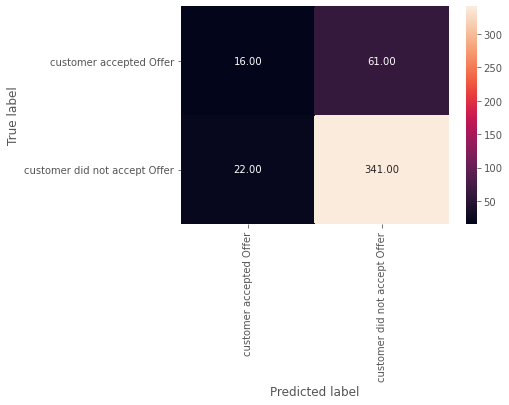

In [46]:
# Creating a confusion matrix
#in linear rg we have r2 value, but here we have accuracy
from sklearn import metrics  
%matplotlib inline  
import seaborn as sn
 
def draw_cm( actual, predicted):  
    ##Cret  
    cm = metrics.confusion_matrix( actual, predicted, [1,0])  
    sn.heatmap(cm, annot=True, fmt='.2f',  xticklabels = ['customer accepted Offer', 'customer did not accept Offer'],  yticklabels = ['customer accepted Offer', 'customer did not accept Offer']) 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')  
    plt.show() 

draw_cm( y_pred_df.actual,  y_pred_df.predicted) 

1) Confusion matrix says about comparing actual and predicted values

2) True positive- model predicted that customer accepted the offer and it is true

3) True negative- model predicted customer did not accept the offer and it is true

4) False positive(Type 1 error)- Model predicted customer will accept the offer but actually customer did not accept

5) False Negative(Type 2 error)- Model predicted that customer will not accept the offer but actually customer accepted

6) accuracy= true positive+true negative/total (Right classification of the model)

7) error rate= false positive+false negative/total (1-accuracy)

8) recall-this tells how many of the actual accepted customers that were predicted correctly
true positive/(true positive+false negative)

9) Specificity- it measures the proportion of actual negatives that are correctly identified as negative
true negative/(true negative+false positive)

10)Precision- It tells how many of the customers accepting the offer is correctly predicted actually turned out to be accepted
true positive/(true positive+false positive)

In [47]:
print( metrics.classification_report( y_pred_df.actual,  y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       363
           1       0.42      0.21      0.28        77

    accuracy                           0.81       440
   macro avg       0.63      0.57      0.58       440
weighted avg       0.77      0.81      0.78       440



the f score- it used harmonic mean of recall and precision, so high value better result

In [48]:
# Area under the curve
auc_score = metrics.roc_auc_score( y_pred_df.actual,  y_pred_df.predicted_prob)  
round( float( auc_score), 2) 

0.7

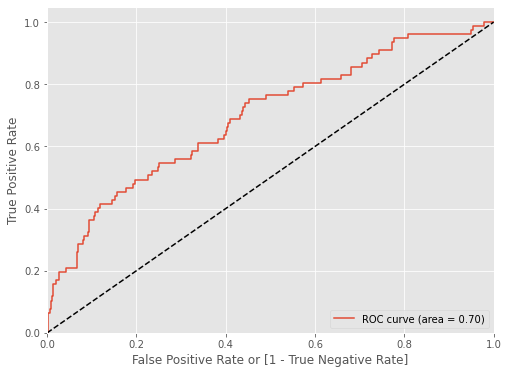

In [49]:
def draw_roc( actual, probs): 
    
    #Obtain fpr, tpr, thresholds   
    fpr,tpr, thresholds = metrics.roc_curve( actual,  probs,  drop_intermediate = False)  
    auc_score = metrics.roc_auc_score( actual, probs)  
    plt.figure(figsize=(8, 6))  
    #Plot the fpr and tpr values for different threshold values  
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)'% auc_score) 
    #draw a diagonal line connecting the origin and top right most point  
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0])  
    plt.ylim([0.0, 1.05])  
    #Setting x and y labels  
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')  
    plt.ylabel('True Positive Rate')  
    plt.legend(loc='lower right')  
    plt.show() 
    return fpr, tpr, thresholds  

thresholds = draw_roc( y_pred_df.actual,  y_pred_df.predicted_prob) 

we are plotting false positive rate in x axis and true positive rate in y axis

This summarises the performance of the classifier

area unde the curve is 70percent

More area covered better the model



# We have 2 methods for cut-off
1)Yoden's index
2) cost based approach

we are doing yoden's index approach

In [50]:
fpr,tpr, thresholds = metrics.roc_curve( y_pred_df.actual,  y_pred_df.predicted_prob,  drop_intermediate = False)
tpr_fpr = pd.DataFrame({'tpr': tpr,  'fpr': fpr,  'thresholds': thresholds}) 
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr  
tpr_fpr.sort_values( 'diff', ascending = False )[0:20] 

,tpr,fpr,thresholds,diff
221,0.753247,0.451791,0.090676,0.301456
222,0.753247,0.454545,0.090612,0.298701
108,0.493506,0.195592,0.164664,0.297914
91,0.454545,0.157025,0.185772,0.297521
74,0.415584,0.118457,0.204819,0.297127
217,0.740260,0.443526,0.091867,0.296734
223,0.753247,0.457300,0.090574,0.295946
109,0.493506,0.198347,0.163111,0.295159
132,0.545455,0.250689,0.131407,0.294766
92,0.454545,0.159780,0.183981,0.294766


For every observaton it is calculating the sensitivity and specificity, it is giving threshold value.

We are doing this on test data,

# Recommendations

1) From correlation matrix we have seen that if income increases the spending on the products increases, so the company need to attract high income people, so that the company can get more profits

2)if we see that most of the customers responses in buying the product from the last campign is 0, which means they are not interested, so the company need to make changes to the products according to the customer requirements, the customer requirements can be known through surveys

3)The company has to target educated customers primarily followed by the other to improve their sales and revenue.

4)The company has to conduct its campaigns more in the countries like Mexico, where there are fewer sales

5)The company has to develop more innovative campaigns and reach out to the customers because many customers don’t have impacted campaigns in their purchases

6)Number of married customers are the more for this store. so introducing new products related to couples will gain revenue. Though there are more sales from married customers, the company has to attract other customers to improve its customer base

7) The company need to promote the products using different social media platofrms, as many of them are engaging there, these days and after offering disounts, customers purchases are less, it maybe because lo awareness, so company need to promote more.

# Conclusion

From clustering the company will get to know about the products category in which groups they fall and this will help them to improve their products and their prices.
From logistic regression we can say that the customers buying the products according to the campaign are very less, these days social media is the best option to create awareness about the products where they can get more customers